# TTS (Text to Speech)

- TTS 모델은 텍스트를 자연스러운 음성으로 변환하는 AI 모델이다.
  - tts-1 : 실시간 텍스트-음성 변환에 최적화된 최신 모델로 속도에 중점. 텍스트를 음성으로 빠르게 변환하는 기능 제공.
  - tts-1-hd : 품질에 최적화된 최신 텍스트-음성 변환 모델로 높은 품질에 중점. 음성의 자연스러움과 선명도 강조.
  </br>
  </br>
- 음성 선택지
  - Alloy: 부드럽고 자연스러운 톤의 음성
  - Echo: 명확하고 자신감 있는 음성
  - Fable: 이야기 전달에 적합한 서정적인 음성
  - Onyx: 전문적이고 신뢰감을 주는 음성
  - Nova: 활기차고 에너지 넘치는 음성
  - Shimmer: 부드럽고 진정시키는 음성

In [4]:
!pip install dotenv

In [5]:
from dotenv import load_dotenv

load_dotenv()

False

In [6]:
from openai import OpenAI

client = OpenAI()

input_text = "사람의 귀천은 행실이 가늠하는 것이지. 신분의 고하에 구애되지를 않는다. 신분의 한계를 핑계 삼아서 헛되이 살지 말거라. 의원이라고 자처하는 하고 많은 부류 중에 내가 진실로 의원으로 인정하는 것은 심의뿐이다. 마음심자 '심의'. 병자를 대하여 진실로 긍휼히 여기는 마음가짐이 있어야 심의야. 허명만 좇지 말고. 세상에 진실로 기다리고 있는 의원은 오로지 심의 뿐이라는 것을 명심해라."

with client.audio.speech.with_streaming_response.create(
    model="tts-1",
    voice="fable",
    input=input_text
) as response:
  response.stream_to_file("tts_output.mp3")

ModuleNotFoundError: No module named 'openai'

# STT (Speech to Text)

- Whisper는 OpenAI에서 개발한 범용 음성 인식 모델로, 다양한 오디오 데이터셋을 학습하여 다국어 음성 인식, 음성 번역, 언어 식별 등의 작업을 수행할 수 있다.

In [ ]:
from openai import OpenAI

client = OpenAI()

with open("tts_output.mp3", "rb") as f:
  transcriptions = client.audio.transcriptions.create(
      model="whisper-1",
      file=f
  )
  print(transcriptions)

Transcription(text='사람의 귀천은 행실이 가늠하는 것이지 신분의 고아에 구애되지를 않는다. 신분의 한계를 핑계삼아서 헛되이 살지 말거라. 의원이라고 자처하는 하고 많은 부류 중에 내가 진실로 의원으로 인정하는 것은 심의뿐이다. 마음심자 심의. 병자를 대하여 진실로 근큐리 여기는 마음가짐이 있어야 심의야. 허명만 접지 말고 세상의 진실로 기다리고 있는 의원은 오로지 심의뿐이라는 것을 명심해라.', logprobs=None)


---

# gTTS

In [ ]:
# !pip install gtts

In [ ]:
from gtts import gTTS

tts = gTTS(text="안녕하세요, 저는 래빗입니다. 좋은 하루입니다!", lang="ko")

tts.save('gtts_output.mp3')

# SpeechRecognition

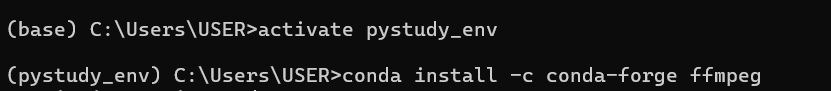

In [ ]:
# %pip install SpeechRecognition

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# %pip install pydub pyaudio

Note: you may need to restart the kernel to use updated packages.


In [8]:
# 음성 입력 -> 텍스트 출력 
import speech_recognition as sr

recognizer = sr.Recognizer()

while True: # 마이크로부터 음성을 계속 입력받기 위한 무한 루프
    with sr.Microphone() as source: # 마이크로부터 음성 감지
        print("말씀하세요.")
        audio = recognizer.listen(source)   # 음성 데이터 수집 
        txt = recognizer.recognize_google(audio, language="ko-KR")   # 음성 -> 텍스트 변환
        print(txt)

말씀하세요.
아아아
말씀하세요.


UnknownValueError: 

In [ ]:
from pydub import AudioSegment
import speech_recognition as sr

# .mp3 파일을 .wav로 변환 
audio = AudioSegment.from_mp3('gtts_output.mp3')
audio.export('gtts_output_wav.wav', format='wav')

# 파일 로드
r = sr.Recognizer()
input_audio = sr.AudioFile('gtts_output_wav.wav')

# 음성 데이터 -> 텍스트 변환
with input_audio as source: 
    audio = r.record(source) 

result_txt = r.recognize_google(audio_data=audio, language='ko-KR')